# 당뇨병 예측

* 피마 인디어(Pima Indians) 당뇨 데이터셋
- 미국 국립보건원 산하의 당뇨 소화 질병 센터가 제공하고 캐글을 통해 공개한 것
- 피마 인디언은 아리조나주에 살던 아메리카 원주민 부족이다. 이 부족은 유전적으로 당뇨에 취약해 당뇨 연구에 자주 활용됐다. 피마 인디언은 오랜 기근을 견딜 수 있는 유전자를 지닌 것으로 알려져 있으며, 이 유전자는 섭취한 포도당과 탄수화물을 체내에 저장해 기근이 잦았던 환경에서 살아남을 수 있게 도왔다. 
- 하지만 근대 사회로 접어든 후 가공 식품 위주로 식습관을 바꾸면서 피마 인디언의 제2형 당뇨 발병률이 증가했다. 지금도 제2형 당뇨 발병률은 전 세계에서 피마 인디언이 가장 높다. 그로 인해 피마 인디언을 대상으로 당뇨와 연관된 유전자를 찾으려는 연구도 활발하다. 
- <u><b>피마 인디언 당뇨 데이터셋은 몇몇 여성 피마 인디언의 의료 진단 자료와 진단 후 5년 내 당뇨 발병 여부로 구성된다.</b></u> 
  

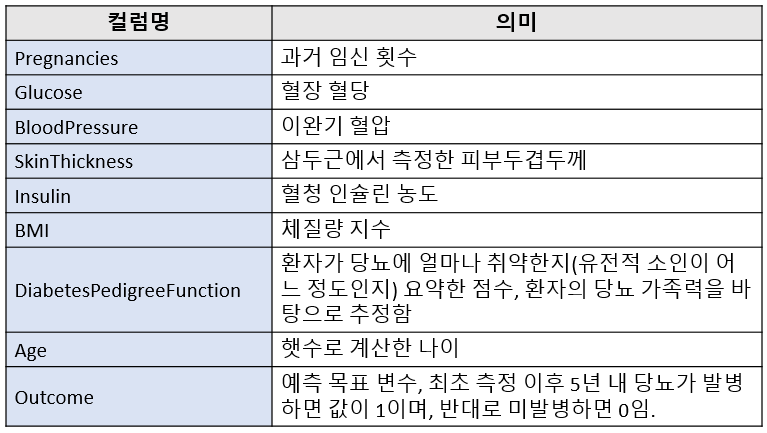

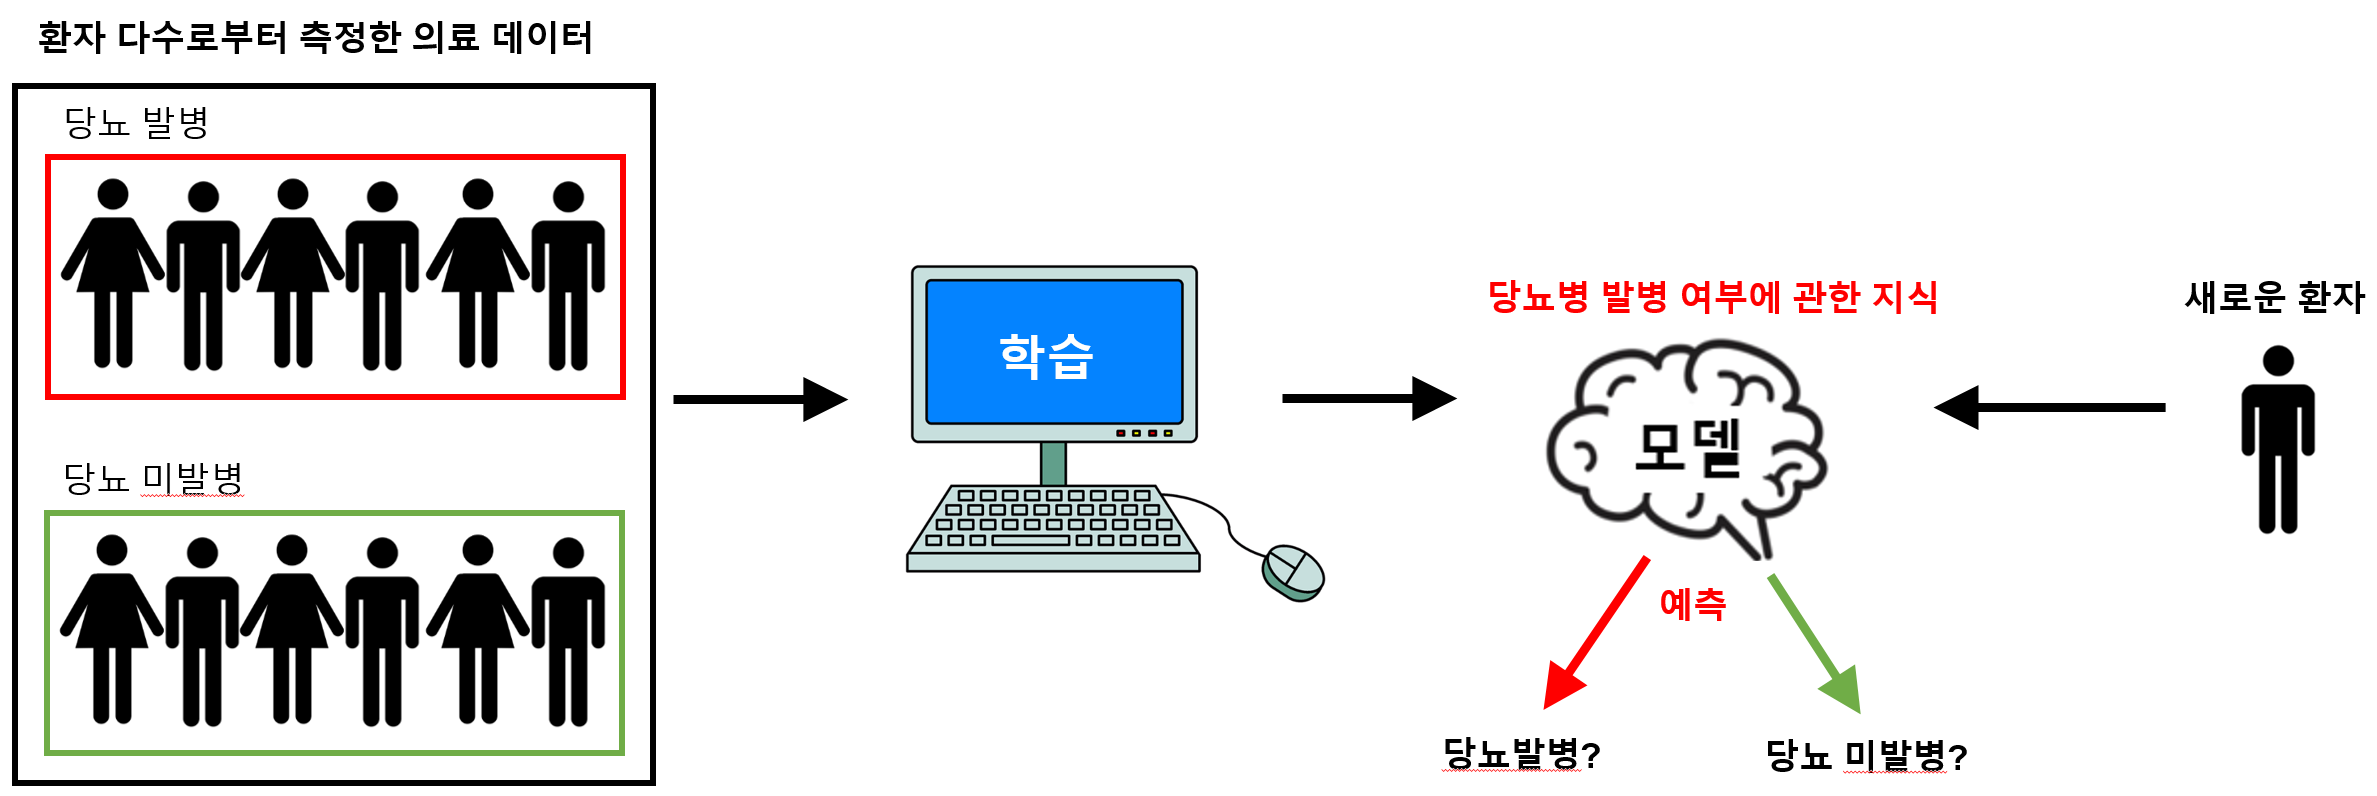

## 1 탐색적 데이터 분석

In [1]:
# 라이브러리 임포트

import pandas as pd

In [4]:
# ./data/diabetes.csv 파일을 읽어 df에 대입

df = pd.read_csv('/content/drive/MyDrive/ChangProgram/data/diabetes.csv')

In [5]:
# df의 앞쪽 5개의 데이터 확인

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# df의 샘플 데이터 5개 확인

df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
468,8,120,0,0,0,30.0,0.183,38,1
459,9,134,74,33,60,25.9,0.460,81,0
80,3,113,44,13,0,22.4,0.140,22,0
255,1,113,64,35,0,33.6,0.543,21,1
367,0,101,64,17,0,21.0,0.252,21,0


In [7]:
# 몇행 몇열?

df.shape

(768, 9)

In [8]:
# df의 요약 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 결측치 확인

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20d47c4450>,
      dtype=object)

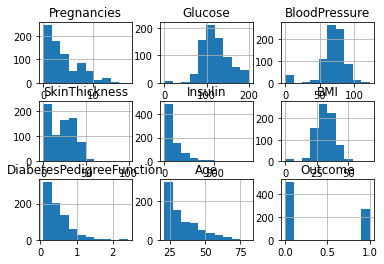

In [10]:
# df의 hist() 메소드를 이용하여 히스토그램을 시각해본다.

df.hist()

In [11]:
# matplotlib.pyplot임포트

import matplotlib.pyplot as plt

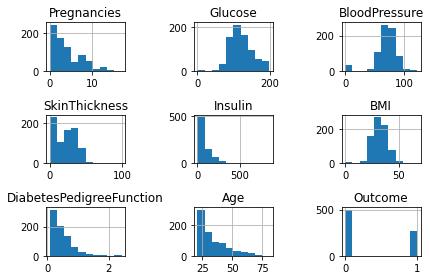

In [12]:
#  pypolt을 이용해 히스토그램을 좀더 잘 시각화해보기

df.hist()
plt.tight_layout()
plt.show()

* age 차트를 보면 젊은 환자가 대부분이고 특히 20대와 30대가 가장 많다는 것을 알수 있다.
* BMI, BloodPressure, Glucose 분포는 인구 관련 통계에서 흔히 볼 수 있는 종모양의 정규분포를 이루고 있음을 알 수 있다.
* Glucose 분포에는 다소 극단적인 값이 보이는데, 혈장 혈당이 무려 200에 가까운 환자도 있다.
* 반면 BMI, BloodPressure, Glucose 값이 0인 환자도 있다. 하지만 이 수치들은 0이 될 수 없으며 결측치일 확률이 높다.
* Pregnancies 분포에도 일부 이상치(outlier)가 있는데 이 중에는 심지어 15번 임신한 사람도 있다. 물론 불가능한 일은 아니지만 이상치는 예측 결과를 왜곡할 수 있기 때문에 분석에 항상 유의해야한다.


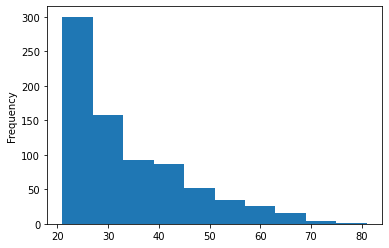

In [13]:
# df의 'Age'열을 선택해 히스토그램을 시각화해본다.

df['Age'].plot.hist()

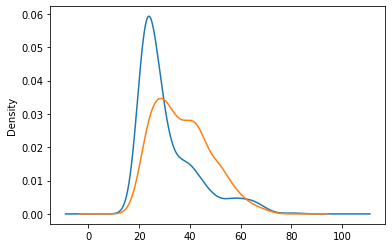

In [14]:
# 당뇨병에 걸리지 않은 사람의 'Age'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'Age'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome']==0, 'Age'].plot.kde()
df.loc[df['Outcome']==1, 'Age'].plot.kde()

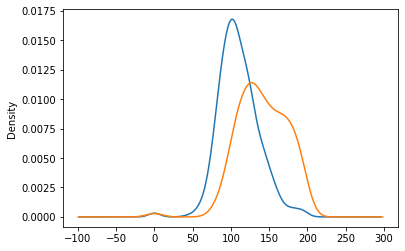

In [15]:
# 당뇨병에 걸리지 않은 사람의 'Glucose'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'Glucose'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome'] == 0, 'Glucose'].plot.kde()
df.loc[df['Outcome'] == 1, 'Glucose'].plot.kde()

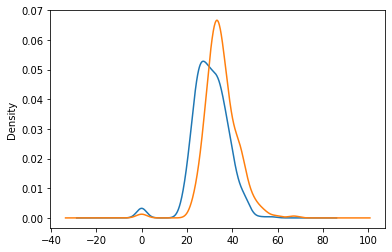

In [16]:
# 당뇨병에 걸리지 않은 사람의 'BMI'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'BMI'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome'] == 0, 'BMI'].plot.kde()
df.loc[df['Outcome'] == 1, 'BMI'].plot.kde()

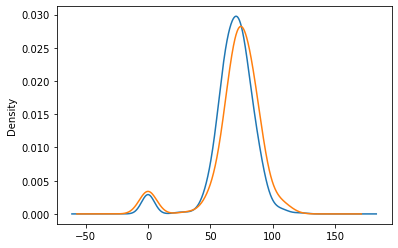

In [17]:
# 당뇨병에 걸리지 않은 사람의 'BloodPressure'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'BloodPressure'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome'] == 0, 'BloodPressure'].plot.kde()
df.loc[df['Outcome'] == 1, 'BloodPressure'].plot.kde()

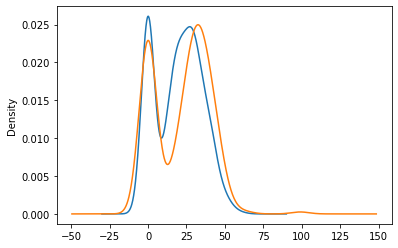

In [18]:
# 당뇨병에 걸리지 않은 사람의 'SkinThickness'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'SkinThickness'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome'] == 0, 'SkinThickness'].plot.kde()
df.loc[df['Outcome'] == 1, 'SkinThickness'].plot.kde()

* 당뇨 미발병자의 Glucose는 100을 중심으로 한 정규분포를 보인다. 즉, 건강한 사람의 혈당은 대부분 100mg/dL정도이다. 반면 당뇨 발병자의 경우 분포가 더 넓고 150주변에 위치한다. 다시 말해 당뇨 발병자는 혈당 수치 범위가 더 넓고 평균은 150mg/dL정도이다.
* 이렇듯 비발병자와 발병자의 혈당 수치에는 상당한 차이가 있는데, BMI와 Age에서도 비슷한 양상을 볼 수 있다.
* 즉, GluCose, BMI, Age는 당뇨 예측에 있어서 중요한 변수가 될 것이다.당뇨가 발병한 환자는 대체로 혈당과 BMI가 높고 나이가 많다.
* 반면 BloodPressure나 SkinThickness 변수의 경우 발병자와 비발병자 분포 사이에 큰 차이가 없다. 즉, 발병자와 비발병자의 혈압 수치와 피부 두께는 서로 비슷하다. 따라서 BloodPressure와 SkinThickness 변수는 당뇨 예측에 그다지 기여하지 못할 것이다.


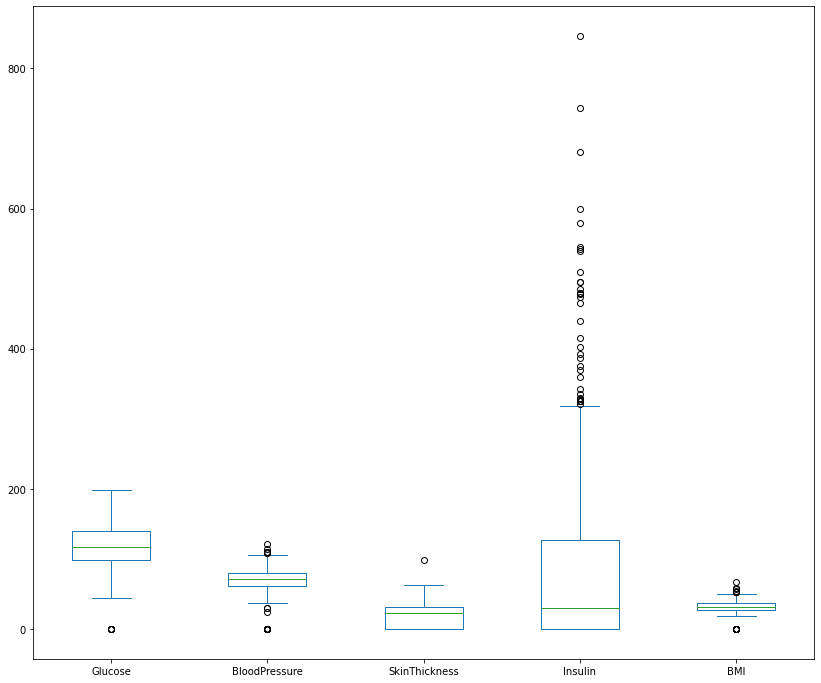

In [19]:
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' 데이터를 박스플롯으로 시각화해본다.

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].plot.box(figsize=(14, 12))

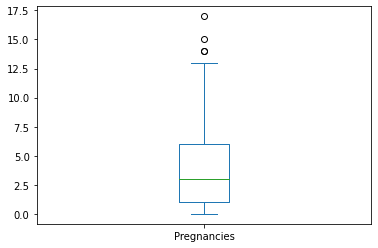

In [20]:
# Pregnancies 데이터를 박스플롯으로 시각화해본다.

df['Pregnancies'].plot.box()

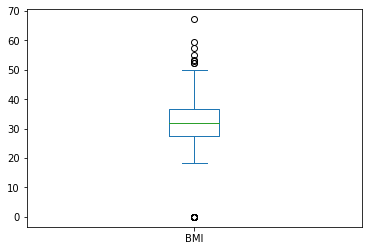

In [21]:
# BMI 데이터를 박스플롯으로 시각화해본다.

df['BMI'].plot.box()

In [22]:
# Outcome 열의 데이터 분포 확인하기

df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

* 65%가 0번 즉, 미발병이고, 나머지 35%가 1번 즉, 당뇨발병이다.

* 히스토그램을 보면 변수 값의 범위가 서로 다르다는 것을 알 수 있다. 예를 들어 DiabetesPedigreeFunction 변수 값은 0에서 2.5 사이인 반면, Insulin 변수 값은 0에서 800 사이이다. 변수마다 범위가 다르면 신경망을 훈련시킬 때 문제가 발생할 수 있는데, 범위가 큰 변수가 작은 변수보다 예측에 더 큰 영향을 미치기 때문이다. 

## 2 데이터 전처리

* <u>데이터셋의 일부 컬럼 값이 0이고 변수의 범위가 서로 달라 모델 성능에 악영향을 줄 수 있다. 데이터를 전처리하여 이문제를 해결한다.</u>
 

### 2.1 결측치 처리

In [23]:
# df의 결측치 확인

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* 결측치를 확인한 결과 마치 결측치가 없는 것처럼 보인다.

In [24]:
# df의 기술통계정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* 총 768개의 데이터가 있고 Pregnancies, Glucose, BloodPressure, SkinTickness, Insulin, BMI 컬럼의 최소값이 모두 0이다. 하지만 이들 중 어떤 컬럼의 수치는 0이 될 수가 없으므로 0값은 결측치임을 알 수 있다.

In [25]:
# Pregnancies 컬럼의 데이터값이 0인 행의 개수 구하기

df.loc[df['Pregnancies'] ==0].shape[0]

111

In [26]:
# df의 컬럼 명들을 변수 columns에 대입

columns = df.columns

In [27]:
# for문으로 모든 컬럼들에 대해 컬럼의 데이터 값이 0인 행의 개수를 구한다.

for c in columns:
    count = df.loc[df[c] == 0].shape[0]
    print(c, count)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


* Insulin 컬럼에 0이 374개가 있다. Insulin 값이 0인 행을 제거하면 모델의 성능이 크게 나빠질 것이다.
따라서 정상적인 데이터의 평균, 중앙값 또는 최빈값으로 결측치를 대체하는 것이 낫다.
* Glucose, BloodPressure, SkinThickness, Insulin, BMI는 모두 연속 변수이므로 평균값을 구해 결측치를 대체하도록 한다.
* 0을 NaN으로 바꿔서 결측치를 인식할 수 있게 한다.

In [28]:
# 결측치를 처리할 컬럼명들['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']을 리스트에 담아 변수 change_columns 에 대입한다.

change_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [29]:
# NaN처리를 위해 numpy를 임포트한다.

import numpy as np

In [30]:
# for 문을 이용하여 change_columns에 있는 컬럼들의 데이터 중 0을 NaN으로 바꾼다.

for c in change_columns:
    df[c] = df[c].replace(0, np.nan)

In [31]:
# df의 요약정보를 확인한다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [32]:
# df의 결측치를 확인한다.

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
# df의 기술통계 정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* df의 결측치를 처리한다. 즉 NaN을 평균값으로 대체한다.

In [34]:
# chagne_colums를 확인한다.

change_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [35]:
# for문을 이용하여 결측치를 처리할 컬럼들의 NaN을 각 컬럼의 평균값으로 대체한다.

for c in change_columns:
    df[c] = df[c].fillna(df[c].mean())

In [36]:
# df의 요약 정보를 확인하다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [37]:
# df의 결측치를 확인한다.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
# df의 기술통계 정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.2 데이터 표준화 (Data Scaling)
* <u>데이터셋의 각 숫자 변수를 평균이 0, 분산이 1이 되도록 변환하는 데이터 전처리 과정</u>이다.
* 앞서 살펴봤듯이 Insulin과 DiabetesPedigreeFunction 변수는 범위가 크게 다르다. Insulin의 최대값이 846인 반면에 DiabetesPedigreeFunction의 최대값은 2.42이다. 이 정도로 범위가 다른 데이터셋으로 신경망을 훈력시키면 범위가 큰 변수가 더 강하게 작용해 신경망이 이 변수에 더 중심을 두게 된다. 따라서 데이터 표준화가 필요하다.
* 데이터 표준화는 사이킷런의 preprocessing 클래스를 사용해 수행할 수 있다.

In [40]:
# sklearn.preprocessing을 임포트한다.

from sklearn import preprocessing

In [39]:
# df확인

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [42]:
# preprocessing.scale() 메소드를 이용하여 df를 표준화한다.
# 결과를 df_scaled 변수에 대입한다.

df_scaled = preprocessing.scale(df)
df_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [44]:
# preprocessing.scale() 메소드는 판다스의 DataFrame이 아닌 다른 객체를 반환하므로 결과를 다시 DataFrame객체로 변환한다.

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,-0.732120
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1.365896


In [45]:
# Outcome컬럼은 우리가 알고자 하는 값이므로 표준화 할 필요가 없다.
# df_scaled의 Outcome컬럼을 df의 Outcome컬럼으로 바꾸자.

df_scaled['Outcome'] = df['Outcome']
df_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,2.544261e-17,-3.301757e-16,6.966722e-16,6.866252e-16,-2.352033e-16,3.090699e-16,2.462585e-16,1.857600e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


In [46]:
# 표준화가 잘 되었는지 확인
# df_scaled.describe().loc[['mean', 'std', 'max']].round(2).abs()

df_scaled.describe().loc[['mean', 'std', 'max']].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [48]:
# df_scaled를 df에 대입

df = df_scaled
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


### 2.3 데이터셋 분할
* 데이터 저처리의 마지막 단계로 데이터셋을 다음 두가지 데이터셋으로 나눠야 한다.
<br>

- 훈련 데이터셋(training set) : 모델을 학습시킬 때 사용되는 데이터셋
- 테스트 데이터셋(testing set) : 학습된 모델을 평가하는 데 사용되는 데이터셋

In [49]:
# train_test_split을 임포트한다.

from sklearn.model_selection import train_test_split

* 독립변수(원인변수)와 종속변수(결과변수) 설정|

In [51]:
# df의 컬럼중 Outcome이 아닌 것만 선택하기

df.columns != 'Outcome'

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [52]:
# 특징(독립)변수를 X에 대입

X = df.loc[:, df.columns != 'Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732


In [53]:
# 목표(종속)변수를 Y에 대입

Y = df.loc[:, 'Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [55]:
# 데이터셋 df를 훈련 데이터셋과 테스트 데이터셋으로 분할하기

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## 3 머신 러닝

### 3.1 모델구조 만들기

In [57]:
# 필요한 라이브러리(모듈) 임포트

from keras.models import Sequential
from keras.layers import Dense

In [58]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입

model = Sequential()

In [59]:
# 특징(독립)변수가 8개, 노드가 32개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(32, input_dim=8, activation='relu'))

In [61]:
# 노드가 16개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(16, activation='relu'))

In [62]:
# 목표(종속)변수 1개, 활성화함수='sigmoid'를 설정하여 하나의 Dense레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(1, activation='sigmoid'))

In [63]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수는 최적의 가중치를 학습하기 위해 필수적인 부분
# 손실함수를 'binary_crossentropy'로 - 분류일 때, 회기일때는 'categorical'
# 평가지표(metrics)를 'accuricy'로,
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

### 3.2 모델 학습시키기

In [65]:
# 모델을 X_train과 Y_train, 즉 훈련데이터셋을 이용하여 학습시킴

model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.8974
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.8974
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.9039
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.8958
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2430 - accuracy: 0.8958
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.9039
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.8958
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2404 - accuracy: 0.9055
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.8941
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.8958
Epoch 11/

### 3.3 모델 평가하기

In [66]:
# 훈련 데이터셋을 이용해 model을 평가하기

model.evaluate(X_train, Y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9414


[0.1753055602312088, 0.9413681030273438]

In [67]:
# 테스트 데이터셋을 이용해 model을 평가하기

model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.7490 - accuracy: 0.7208


[0.7489734292030334, 0.7207792401313782]

* 훈련 데이터 셋으로 평가한 정확도와 테스트 데이터 셋으로 평가한 정확도에 차이가 있다.
* 이는 훈련 데이터셋으로 모델을 훈련시켰기때문에 당연한 결과이다.
* 반복 횟수를 늘려 모델을 훈련시키면 훈련 데이터셋 정화도를 100%로 만들 수도 있지만, 모델이 훈련 데이터셋에 과적합(overfit)하는 문제가 생기므로 바람직하지 않다.
* 테스트 데이터셋은 모델이 아직 접하지 못한 실세계 데이터를 의미하므로 모델의 최종 성능을 평가는 데 사용해야 한다.

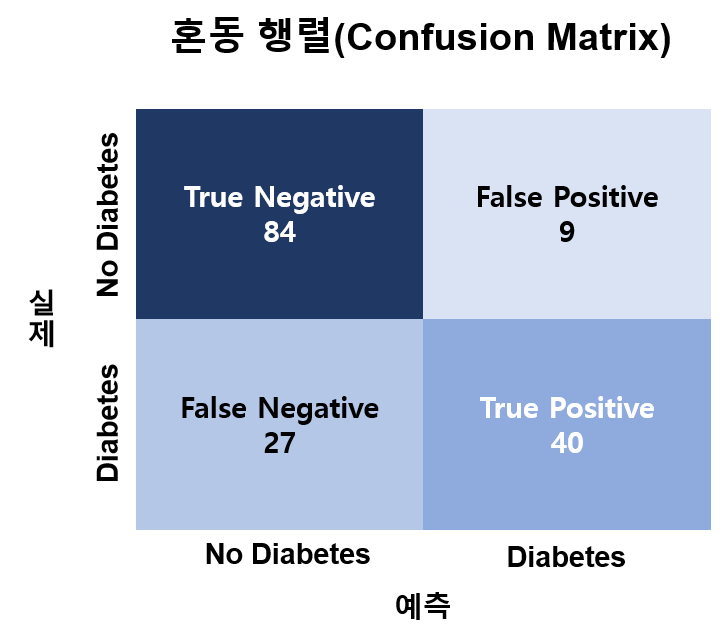

* 혼동 행렬(Confusion Matrix)
    * 모델이 예측한 결과의 진음성(True Negative), 위양성(False Positive), 위음성(False Negative), 진양성(True Positive) 지표를 분석할 수 있는 유용한 시각화 방식이다.
    * 진음성(True Negative) : 실제 클래스가 음성(당뇨 비발병)이고, 모델도 음성(당뇨 비발병)으로 예측한 경우
    * 위양성(False Positive) : 실제 클래스가 음성(당뇨 비발병)이지만, 모델이 양성(당뇨 발병)으로 예측한 경우
    * 위음성(False Negative) : 실제 클래스는 양성(당뇨 발병)이지만, 모델이 음성(당뇨 비발병)으로 예측한 경우
    * 진양성(True Positive) : 실제 클래스가 양성(당뇨 발병)이고, 모델도 양성(당뇨 발병)으로 예측한 경우


### 3.4 모델을 이용하여 예측해보기

In [71]:
# 학습된 model을 이용하여 예측하기
# X_test의 10개의 데이터를 주면서 결과 예측해보기

model.predict(X_test.iloc[:10]).round().astype('int')

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [69]:
# Y_test의 10개의 실제 데이터 확인하기

Y_test[:10]

471    0
529    0
604    1
46     0
503    0
727    0
655    1
757    1
324    0
37     1
Name: Outcome, dtype: int64

* 혼동행렬 만들기

In [73]:
# confusion_matrix 임포트

from sklearn.metrics import confusion_matrix

In [75]:
# 모델에 X_test를 주고 결과를 예측하고 그 결과를 변수 Y_test_predict에 대입

Y_test_predict = model.predict(X_test).round().astype('int')

In [77]:
# 실제값 Y_test와 모델이 예측한 값 Y_test_predict를 이용하여 혼동행렬 만들기
# 병은 false negative (25) 가 적게 나오는게 중요

confusion_matrix(Y_test, Y_test_predict)

array([[82, 18],
       [25, 29]])

* 이전에 테스트 정확도가 76% 정도가 나왔듯이, 예측 결과도 대부분 진음성과 진양성이다. 나머지는 예측이 틀린 경우이다.
* 당뇨 예측에서는 위양성보다 위음성이 더 위험할 수 있다. 위음성은 5년 내 당뇨가 발병할 환자에게 안심하라고 이야기하는 것과 같다. 따라서 당뇨 발병을 예측하는 모델을 여러 개 만들었다면 위음성이 낮은 모델을 선택해야 한다.